**Exercise 8.2** Suppose you draw a sample with size n = 10 from an exponential distribution with λ = 2.  
Simulate this experiment 1000 times and plot the sampling distribution of the estimate L.  
Compute the standard error of the estimate and the 90% confidence interval.  
Repeat the experiment with a few different values of n and make a plot of standard error versus n.

**IMPORTANT!** [ThinkStats2](https://github.com/AllenDowney/ThinkStats2) should be cloned ../.. relative to this dir.

In [1]:
import sys
import os
import math

import numpy as np
import pandas as pd

In [3]:
import thinkstats2_path
import thinkstats2
import thinkplot

In [19]:
def RMSE(estimates, actual):
    se = 0.
    for e in estimates:
        se += (e-actual)**2
    return math.sqrt(se/len(estimates))        

In [21]:
def SimulateExp(n=10, m=1000, lam=2):
    estimators = []
    for _ in range(m):
        sample = np.random.exponential(scale=1/lam, size=n)
        estimators.append(1/sample.mean())
    cdf = thinkstats2.Cdf(estimators, label='n={}'.format(n))
    stderr = RMSE(estimators, lam)
    confidence_int = (cdf.Value(.05), cdf.Value(.95))
    return cdf, stderr, confidence_int

In [36]:
n_list = [10, 100, 1000]
cdfs = []
rows = []
for n in n_list:
    cdf, stderr, confidence_int = SimulateExp(n)
    cdfs.append(cdf)
    rows.append([stderr, confidence_int])
df = pd.DataFrame(rows, columns=['Stderr', 'Confidence Interval'], index=n_list)
df.index.name = 'Sample Size'

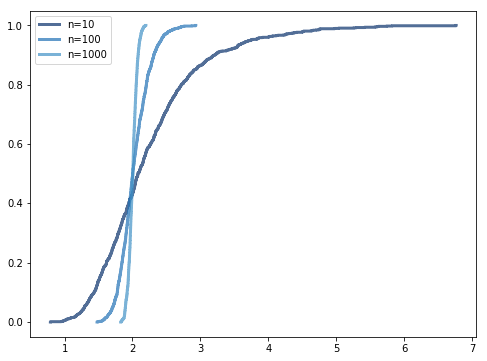

In [35]:
thinkplot.Cdfs(cdfs)
thinkplot.Show()

In [41]:
print(df)

               Stderr            Confidence Interval
Sample Size                                         
10           0.864350  (1.29075739226, 3.8172459705)
100          0.207680  (1.7116852503, 2.38757391051)
1000         0.064909  (1.8946167797, 2.11013607849)
